In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import sqrt

import DataAid
import Neros

In [2]:
# Collect the data from each of the folders
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")

In [3]:
# Get the galaxies we want from each source
NGC5371 = np.array(sparcGalaxies['NGC5371_rotmod'])
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])

In [4]:
NGC5371_rad = NGC5371[:,0]
NGC5371_Vobs = NGC5371[:,1]
NGC5371_gas = NGC5371[:,3]
NGC5371_disk = NGC5371[:,4]
NGC5371_bulge = NGC5371[:,5]
NGC5371_VlumSquared = Neros.VlumSquared(NGC5371_gas, NGC5371_disk, NGC5371_bulge)
NGC5371_Vlum = np.sqrt(NGC5371_VlumSquared)

MW_rad = MWXueSofue[:,0]
MW_Vlum = MWXueSofue[:,1]
# Interpolation function
MW_Vlum_interp_func = interp1d(MW_rad, MW_Vlum, kind='cubic')

In [5]:
NGC5371_Vlum

array([240.9       , 232.56      , 235.54      , 243.76      ,
       245.32      , 253.        , 281.80424766, 301.0640108 ,
       297.9484353 , 297.91609356, 290.69624731, 273.32879724,
       255.76223588, 241.1307498 , 229.42754848, 215.73120892,
       205.04713848, 196.15502874, 188.6676745 ])

## Testing Phi

[X VALUES TO INTEGRATE]
20
[ 0.    1.45  2.88  4.33  5.78  7.22  8.66 11.55 14.48 17.28 20.2  23.12
 26.04 28.84 31.76 34.68 37.48 40.4  43.32 46.24]
[Y VALUES TO INTEGRATE]
20
[0.00000000e+00 4.44695862e-07 2.08658000e-07 1.42363591e-07
 1.14223256e-07 9.26160394e-08 8.21259944e-08 7.63959923e-08
 6.95515183e-08 5.70815780e-08 4.88195813e-08 4.06114515e-08
 3.18777229e-08 2.52020039e-08 2.03414632e-08 1.68643470e-08
 1.37969745e-08 1.15633468e-08 9.86888153e-09 8.55331877e-09]
[PHI VBALUES]
19
[3.22404500e-07 7.89552511e-07 1.04404317e-06 1.23006863e-06
 1.37899292e-06 1.50480719e-06 1.73387146e-06 1.94768456e-06
 2.12497089e-06 2.27958659e-06 2.41015590e-06 2.51599009e-06
 2.59590171e-06 2.66239517e-06 2.71671565e-06 2.75964150e-06
 2.79666757e-06 2.82795862e-06 2.85485504e-06]


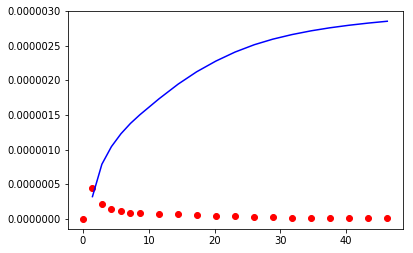

In [9]:
NGC5371_phi, NGC5371_phi_x, NGC5371_phi_y = Neros.Phi(NGC5371_rad, np.square(NGC5371_Vlum) )
plt.plot(NGC5371_phi_x, NGC5371_phi_y, 'ro', NGC5371_phi_x[1:], NGC5371_phi, 'b-')
plt.show()

In [8]:
Vlcm = Neros.Vlcm(NGC5371_rad, MW_Vlum_interp_func(NGC5371_rad), NGC5371_Vlum )
print("Vlcm: ")
print(Vlcm)

[CALCULATING PHI FOR MW]
[X VALUES TO INTEGRATE]
20
[ 0.    1.45  2.88  4.33  5.78  7.22  8.66 11.55 14.48 17.28 20.2  23.12
 26.04 28.84 31.76 34.68 37.48 40.4  43.32 46.24]
[Y VALUES TO INTEGRATE]
20
[0.00000000e+00 2.96045838e-07 1.18109619e-07 7.12638241e-08
 5.09294978e-08 3.82216725e-08 2.99540074e-08 1.97816656e-08
 1.37876589e-08 1.01837348e-08 7.67966997e-09 5.94353868e-09
 4.72982466e-09 3.87762035e-09 3.20300757e-09 2.70483779e-09
 2.31757681e-09 1.99935527e-09 1.73830046e-09 1.52869473e-09]
[PHI VBALUES]
19
[2.14633232e-07 5.10754384e-07 6.48050131e-07 7.36640289e-07
 8.00829132e-07 8.49915621e-07 9.21783669e-07 9.70962730e-07
 1.00452268e-06 1.03060325e-06 1.05049314e-06 1.06607625e-06
 1.07812667e-06 1.08846439e-06 1.09708984e-06 1.10412122e-06
 1.11042394e-06 1.11588092e-06 1.12065073e-06]
[2.14633232e-07 5.10754384e-07 6.48050131e-07 7.36640289e-07
 8.00829132e-07 8.49915621e-07 9.21783669e-07 9.70962730e-07
 1.00452268e-06 1.03060325e-06 1.05049314e-06 1.06607625e-06
 

In [7]:
NGC5371_rad

array([ 1.45,  2.88,  4.33,  5.78,  7.22,  8.66, 11.55, 14.48, 17.28,
       20.2 , 23.12, 26.04, 28.84, 31.76, 34.68, 37.48, 40.4 , 43.32,
       46.24])

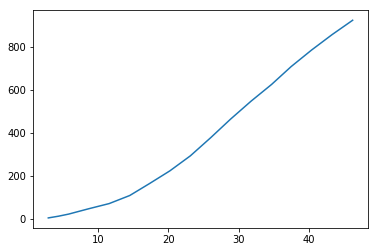

In [8]:
plt.plot(NGC5371_rad, Vlcm)
plt.show()

In [7]:
np.square([2, 4])

array([ 4, 16])